# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="outer")
df_sin_duplicados = combined_data.drop_duplicates(subset=['Mouse ID'])
# Display the data table for preview
display(df_sin_duplicados.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice.
print(f"Total number of mice: {combined_data['Mouse ID'].nunique()}")


Total number of mice: 249


In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")

Duplicate Mouse IDs: ['g989']


In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Data for duplicate Mouse IDs:")
for mouse_id in duplicate_mouse_ids:
    display(combined_data[combined_data['Mouse ID'] == mouse_id])

Data for duplicate Mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
clead_notD = clean_data.drop_duplicates(subset=['Mouse ID'])
display(clead_notD.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mice in the clean DataFrame: {clean_data['Mouse ID'].nunique()}")

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#print("Summary Statistics of Tumor Volume for Each Regimen:")
#print(summary_stats)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by 'Drug Regimen'
grouped_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean of tumor volume for each regimen
mean_tumor_volume = grouped_regimen.mean()

# Calculate median of tumor volume for each regimen
median_tumor_volume = grouped_regimen.median()

# Calculate variance of tumor volume for each regimen
variance_tumor_volume = grouped_regimen.var()

# Calculate standard deviation of tumor volume for each regimen
std_dev_tumor_volume = grouped_regimen.std()

# Calculate standard error of the mean (SEM) of tumor volume for each regimen
sem_tumor_volume = grouped_regimen.sem()

# Combine all calculated statistics into a DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Variance of Tumor Volume': variance_tumor_volume,
    'Standard Deviation of Tumor Volume': std_dev_tumor_volume,
    'SEM of Tumor Volume': sem_tumor_volume
})

# Display the summary statistics table
print("Summary Statistics of Tumor Volume for Each Regimen:")
display(summary_statistics)

Summary Statistics of Tumor Volume for Each Regimen:


,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM='sem'
)

print("Summary Statistics of Tumor Volume for Each Regimen:")
display(summary_statistics)

Summary Statistics of Tumor Volume for Each Regimen:


,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

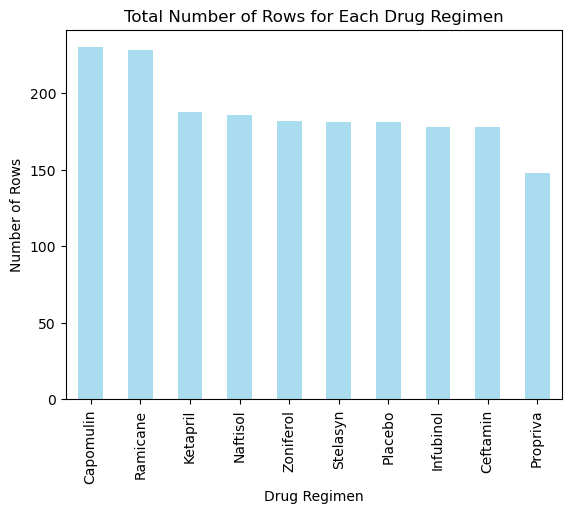

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_counts = clean_data['Drug Regimen'].value_counts()

# Plot the bar plot
drug_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show plot
plt.show()

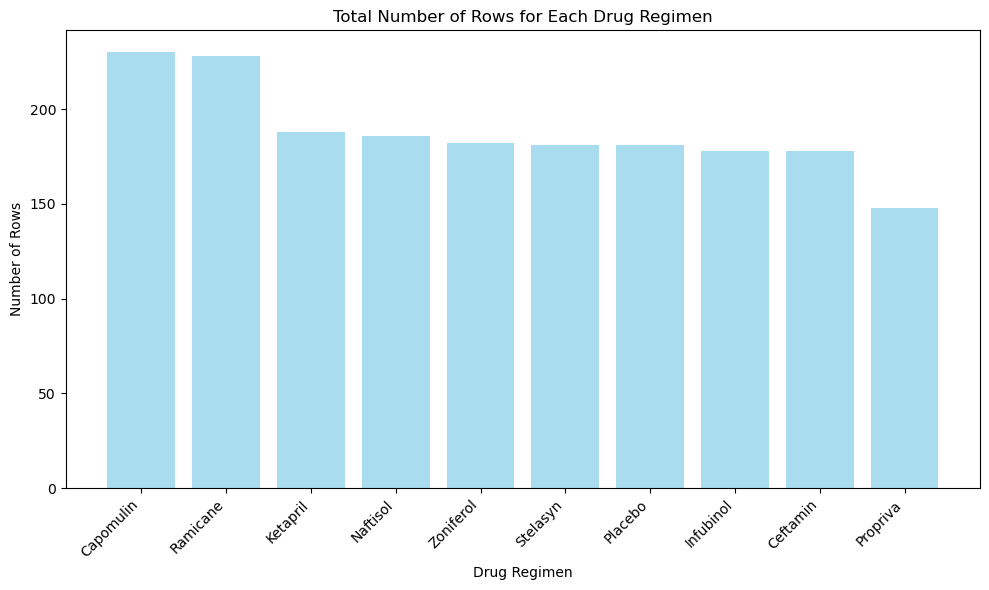

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
drug_counts = clean_data['Drug Regimen'].value_counts()

# Extract regimen names and corresponding counts
regimen_names = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='skyblue', alpha=0.7)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

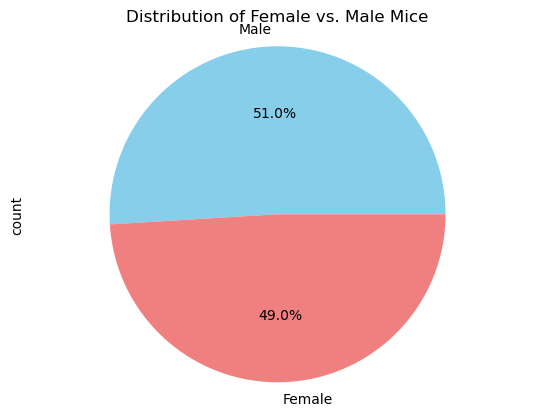

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
sex_counts = clean_data['Sex'].value_counts()

# Plot the pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

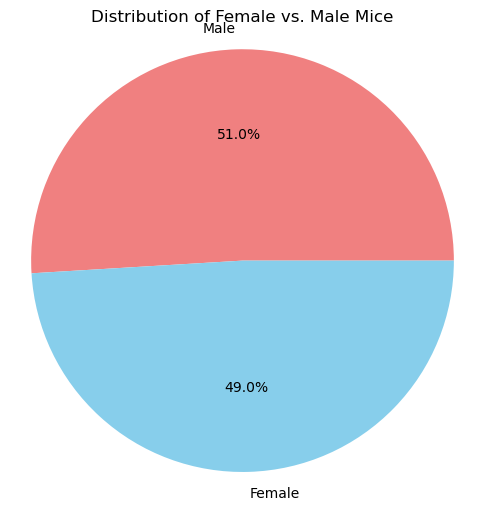

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of male and female mice
sex_counts = clean_data['Sex'].value_counts()

# Extract sex labels and corresponding counts
sex_labels = sex_counts.index
counts = sex_counts.values

# Create the pie plot
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=sex_labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')

specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specified_regimens)]

print("Final Tumor Volume for Each Mouse across the Specified Treatment Regimens:")
display(final_tumor_volume)

Final Tumor Volume for Each Mouse across the Specified Treatment Regimens:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
 tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    
    # add subset 
 tumor_vol_data.append(tumor_vol)
    
 # Calculate quartiles, IQR, and bounds
 quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
 lower_quartile = quartiles[0.25]
 upper_quartile = quartiles[0.75]
 iqr = upper_quartile - lower_quartile
 lower_bound = lower_quartile - (1.5 * iqr)
 upper_bound = upper_quartile + (1.5 * iqr)
 
    # Determine outliers using upper and lower bounds
outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

print(f"Results for {treatment}:")
print(f"  - Lower Quartile: {lower_quartile}")
print(f"  - Upper Quartile: {upper_quartile}")
print(f"  - Interquartile Range (IQR): {iqr}")
print(f"  - Lower Bound: {lower_bound}")
print(f"  - Upper Bound: {upper_bound}")
print(f"  - Potential Outliers: {outliers.values}\n")

Results for Ceftamin:
  - Lower Quartile: 48.72207785
  - Upper Quartile: 64.29983003
  - Interquartile Range (IQR): 15.577752179999997
  - Lower Bound: 25.355449580000002
  - Upper Bound: 87.66645829999999
  - Potential Outliers: []



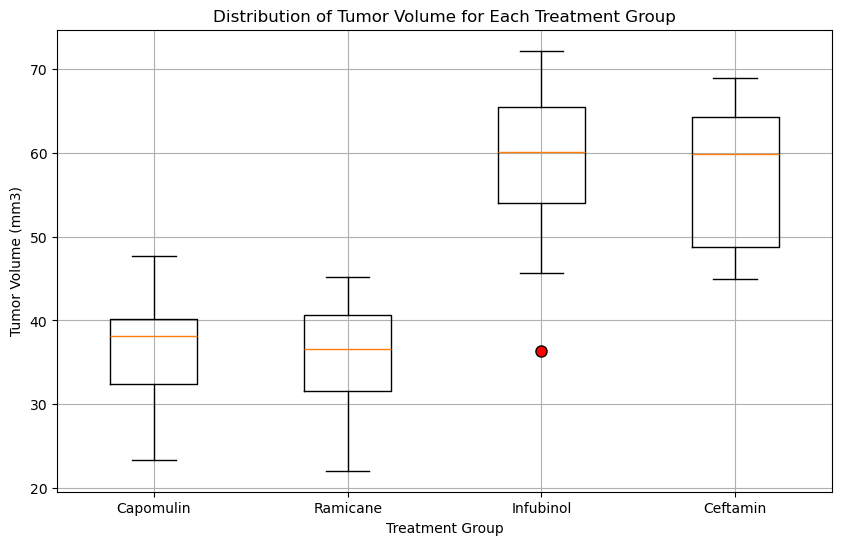

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

## Line and Scatter Plots

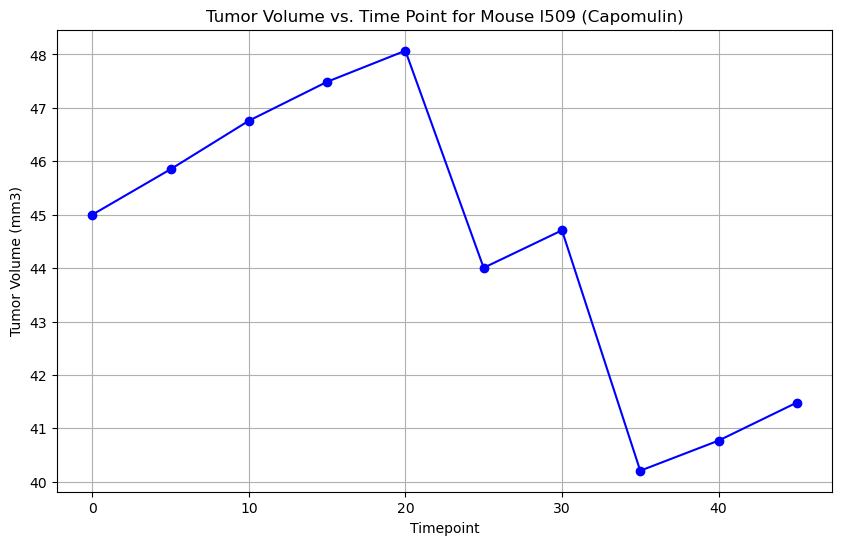

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin (you can choose any Mouse ID)
mouse_id = 'l509'

# Filter the DataFrame for the selected mouse ID
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot the line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add labels and title
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

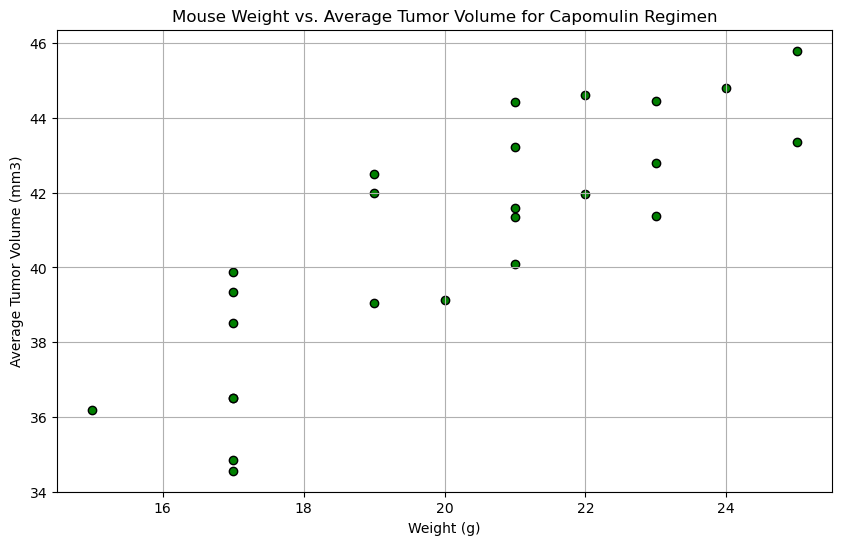

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='green', edgecolors='black')

# Add labels and title
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(True)
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

correlation_coefficient, _ = pearsonr(mouse_weight, avg_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

# Print regression parameters
print("Linear Regression Model:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Correlation Coefficient: 0.8419363424694719
Linear Regression Model:
Slope: 0.9544396890241048
Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


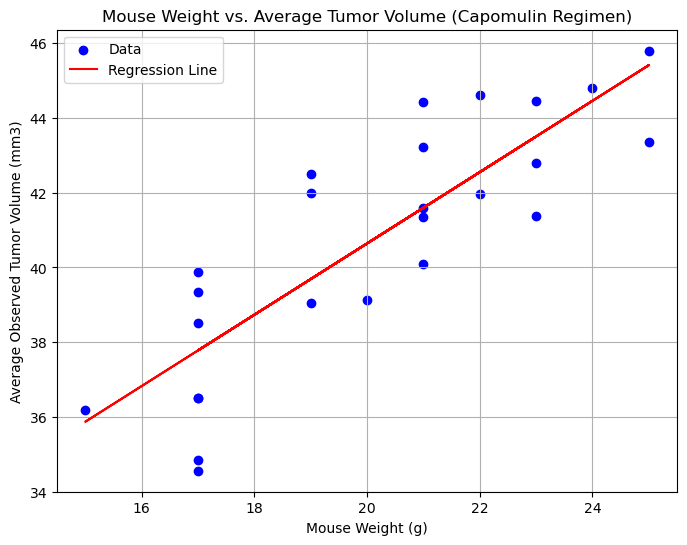

In [67]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', label='Data')

# Plot the regression line
plt.plot(mouse_weight, slope * np.array(mouse_weight) + intercept, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Observed Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()